##### Author: Jimin Kim (jk55@uw.edu)
##### Version 1.5.0

# Lab 5 Report

In [ ]:
## Group Members: Noah Lesure, Ashvath Premkumar

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
import dynworm as dw

## Exercise 1: Visualize brain connectomes

<img src="lab5_exercise1.png" width="1000">

In [2]:
# Load synaptic connectome and neuron classes

celegans_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
celegans_syn_conn_np = np.array(celegans_syn_conn_pd)

# Classes are ordered according to the neurons' order in synaptic connectome
neuron_classes = np.load('neuron_classes.npy') 

In [3]:
# Adjacency matrix of the first 10 neurons
print(celegans_syn_conn_np[:10, :10])

[[0 0 0 3 0 0 7 0 0 0]
 [0 0 1 0 7 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 2 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [4]:
# Neuron classes of the first 10 neurons
print(neuron_classes[:10])

['sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory' 'sensory'
 'sensory' 'sensory' 'sensory']


In [5]:

# Visualize connectivity matrices for different neuron classes.
# Parameters:
# syn_conn - Connectivity matrix representing synaptic connections between neurons.
# neuron_classes - List of strings specifying the class of each neuron (e.g., 'sensory', 'inter', 'motor').
def vis_conn(syn_conn, neuron_classes):
    
    # Extract connectivity matrices for each neuron class
    sensory_matrix = syn_conn[np.where(np.array(neuron_classes) == 'sensory')[0], :]
    inter_matrix = syn_conn[np.where(np.array(neuron_classes) == 'inter')[0], :]
    motor_matrix = syn_conn[np.where(np.array(neuron_classes) == 'motor')[0], :]
    
    # Create a figure with subplots for each neuron class
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12))  # Adjust the figure size as needed
    fig.suptitle('Brain Connectomes')
    
    # Plot the connectivity matrix for Sensory vs Sensory neurons
    ax1.pcolor(sensory_matrix, cmap='Greys', vmin=0, vmax=1)
    ax1.set_ylim(len(sensory_matrix), 0)
    ax1.set_title('Sensory vs Sensory')
    
    # Plot the connectivity matrix for Inter vs Inter neurons
    ax2.pcolor(inter_matrix, cmap='Greys', vmin=0, vmax=1)
    ax2.set_ylim(len(inter_matrix), 0)
    ax2.set_title('Inter vs Inter')
    
    # Plot the connectivity matrix for Motor vs Motor neurons
    ax3.pcolor(motor_matrix, cmap='Greys', vmin=0, vmax=1)
    ax3.set_ylim(len(motor_matrix), 0)
    ax3.set_title('Motor vs Motor')
    
    # Display the plot
    plt.show()
    

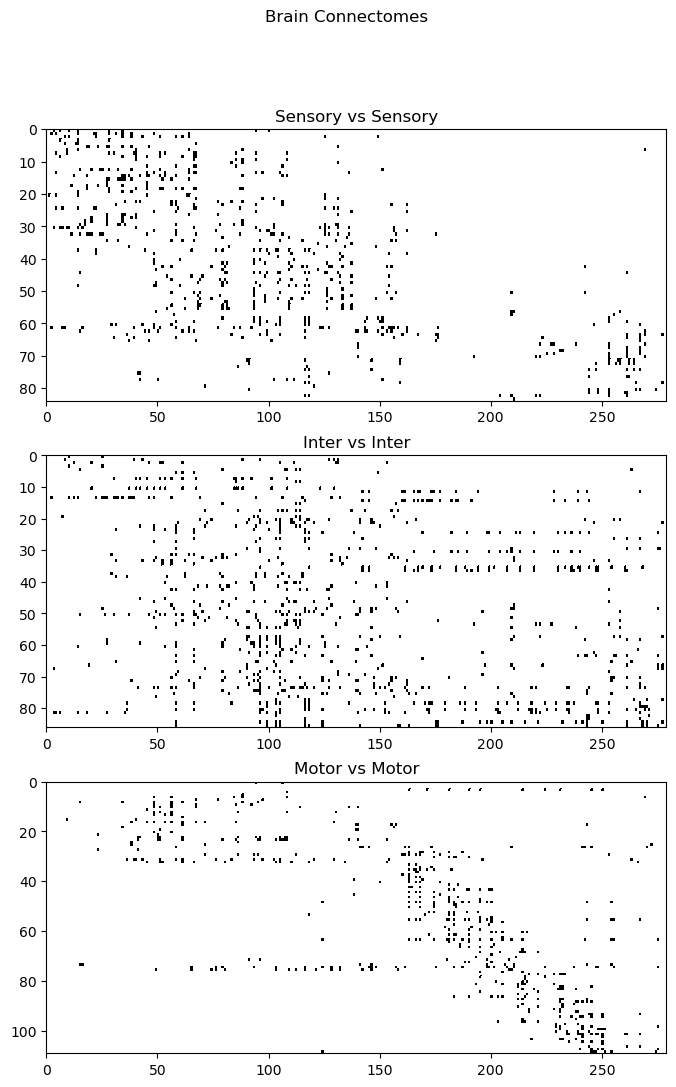

In [6]:
# Test your function here

vis_conn(syn_conn = celegans_syn_conn_np, neuron_classes = neuron_classes)

## Exercise 2: Locating the most connected vertices

<img src="lab5_exercise2.png" width="1000">

In [7]:
# Load the synaptic connectome and sample social network

syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
syn_conn_np = np.array(syn_conn_pd)

social_network_sample_pd = pd.read_excel('social_network_sample.xlsx')
social_network_sample_np = np.array(social_network_sample_pd)

In [8]:
# Function to find hub vertices based on in-degrees and out-degrees of a graph
# Parameters:
# adj_mat - The input adjacency matrix
# num_vertices - The number of highest degree certicies to find for each list
def find_hub_vertices(adj_mat, num_vertices):
    in_degrees = np.sum(adj_mat, axis=0)  # Calculate in-degrees
    out_degrees = np.sum(adj_mat, axis=1)  # Calculate out-degrees

    # Find indices of vertices with the highest in-degrees
    indegree_list = np.argsort(in_degrees)[::-1][:num_vertices]

    # Find indices of vertices with the highest out-degrees
    outdegree_list = np.argsort(out_degrees)[::-1][:num_vertices]

    # Return the lists of indices representing hub vertices based on in-degrees and out-degrees
    return indegree_list, outdegree_list

In [9]:
# Test your function with synaptic connectome

indegree_list_syn_conn, outdegree_list_syn_conn = find_hub_vertices(adj_mat = syn_conn_np, num_vertices = 10)

In [10]:
print(indegree_list_syn_conn)

[105 214 195 231  48  96 181 253  58 163]


In [11]:
print(outdegree_list_syn_conn)

[ 56  48 261  64 253 267  15   7 172 244]


In [12]:
# Test your function with sample social media network

indegree_list_SN, outdegree_list_SN = find_hub_vertices(adj_mat = social_network_sample_np, num_vertices = 5)

In [13]:
print(indegree_list_SN)

[31 62 43 93 53]


In [14]:
print(outdegree_list_SN)

[ 1 99 26 19 49]


## Exercise 3: Removing vertices from a graph

<img src="lab5_exercise3.png" width="1000">

In [15]:
# We will use the pre-existing directed graph sample earlier in the lab

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [16]:
# Function to remove vertices from an adjacency matrix
# Parameters:
# adj_mat - The input adjacency matrix
# vertices_2b_removed - List of indices of vertices to be removed
def remove_vertices(adj_mat, vertices_2b_removed):

    # Create a copy of the adjacency matrix to avoid modifying the original
    adj_mat_new = np.copy(adj_mat)

    # Remove vertices and corresponding edges
    adj_mat_new = np.delete(adj_mat_new, vertices_2b_removed, axis=0)  # Remove rows
    adj_mat_new = np.delete(adj_mat_new, vertices_2b_removed, axis=1)  # Remove columns

    # Return the modified adjacency matrix after removing specified vertices
    return adj_mat_new

In [17]:
vertices_2b_removed_1 = [0, 5]        # Vertices to be removed set 1
vertices_2b_removed_2 = [1, 2, 6]     # Vertices to be removed set 2

In [18]:
# Test your function with set 1

directed_adj_mat_new_1 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_1)

In [19]:
# Test your function with set 2

directed_adj_mat_new_2 = remove_vertices(adj_mat = directed_adj_mat_np, vertices_2b_removed = vertices_2b_removed_2)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

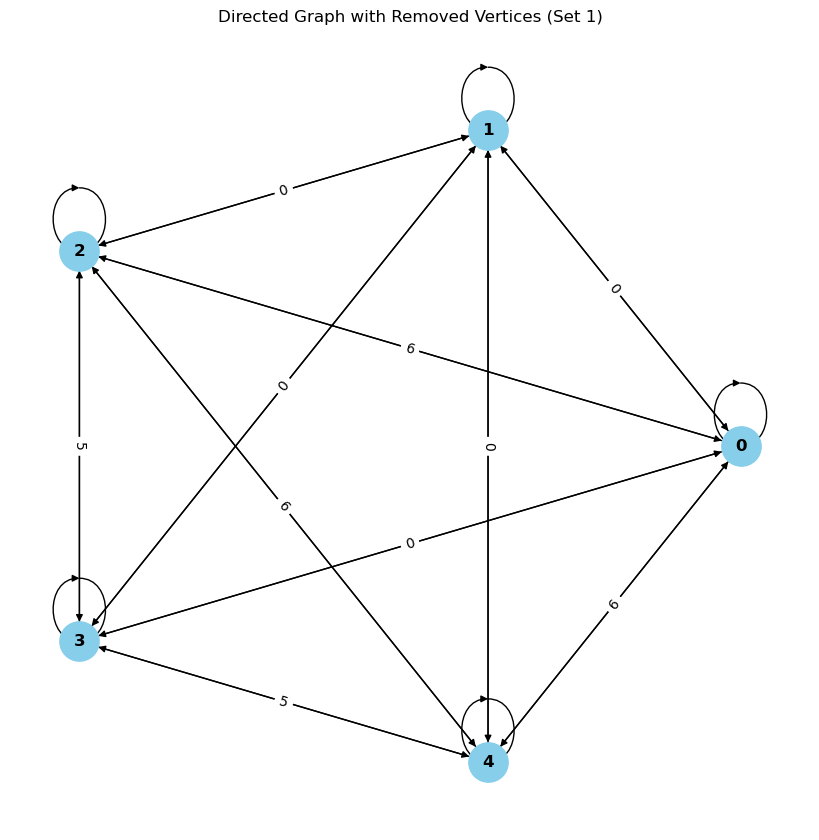

In [20]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_1
# Use circular graph layout
# Label your edges according to their weights

# Create a directed graph G1 and add weighted edges from the provided adjacency matrix
G1 = nx.DiGraph()
G1.add_weighted_edges_from([(i, j, directed_adj_mat_new_1[i, j]) for i in range(directed_adj_mat_new_1.shape[0]) for j in range(directed_adj_mat_new_1.shape[1])])

# Define the layout for the nodes in a circular fashion
pos1 = nx.circular_layout(G1)

# Create a figure for the plot with a specified size
plt.figure(figsize=(8, 8))

# Draw the directed graph G1 with labels, node size, and node color
nx.draw(G1, pos1, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue')

# Get the edge weights as labels for the edges
labels1 = nx.get_edge_attributes(G1, 'weight')

# Draw networkx edge labels using the obtained edge weights
nx.draw_networkx_edge_labels(G1, pos1, edge_labels=labels1)

# Set the title for the plot
plt.title('Directed Graph with Removed Vertices (Set 1)')

# Display the plot
plt.show()

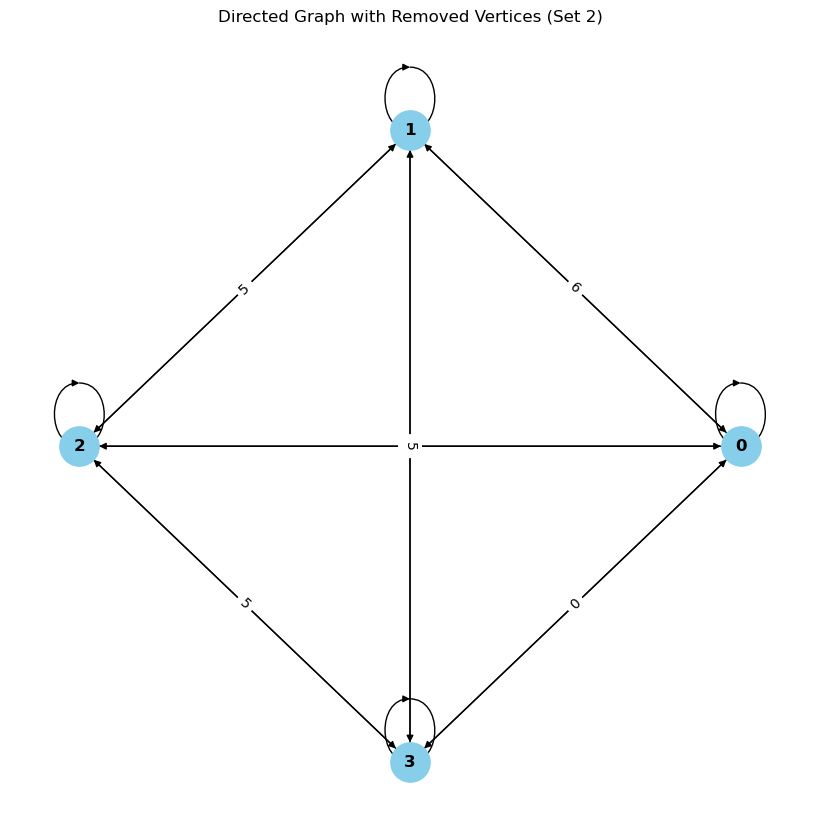

In [21]:
# Using networkX, plot your directed graph with removed vertices according to vertices_2b_removed_2
# Use circular graph layout
# Label your edges according to their weights

# Create a directed graph G2 and add weighted edges from the provided adjacency matrix (directed_adj_mat_new_2)
G2 = nx.DiGraph()
G2.add_weighted_edges_from([(i, j, directed_adj_mat_new_2[i, j]) for i in range(directed_adj_mat_new_2.shape[0]) for j in range(directed_adj_mat_new_2.shape[1])])

# Define the layout for the nodes in a circular fashion
pos2 = nx.circular_layout(G2)

# Create a figure for the plot with a specified size
plt.figure(figsize=(8, 8))

# Draw the directed graph G2 with labels, node size, and node color
nx.draw(G2, pos2, with_labels=True, font_weight='bold', node_size=800, node_color='skyblue')

# Get the edge weights as labels for the edges
labels2 = nx.get_edge_attributes(G2, 'weight')

# Draw networkx edge labels using the obtained edge weights
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=labels2)

# Set the title for the plot
plt.title('Directed Graph with Removed Vertices (Set 2)')

# Display the plot
plt.show()

## Exercise 4: Adding a new vertex to a graph

<img src="lab5_exercise4.png" width="1000">

In [22]:
# We will use the pre-existing directed graph sample earlier in the lab
# The graph has 7 vertices

directed_adj_mat_pd = pd.read_excel('directed_sample.xlsx')
directed_adj_mat_np = np.array(directed_adj_mat_pd)

In [23]:
# Function to add a new vertex to an adjacency matrix with specified outgoing and incoming edges
# Parameters:
# adj_mat - Original adjacency matrix representing the graph
# outgoing_edges - List of indices representing vertices with outgoing edges to the new vertex
# incoming_edges - List of indices representing vertices with incoming edges from the new vertex
def add_vertex(adj_mat, outgoing_edges, incoming_edges):
    
    # Get the number of vertices in the original adjacency matrix
    num_vertices = adj_mat.shape[0]

    # Create a new adjacency matrix with an additional row and column for the new vertex
    adj_mat_new = np.zeros((num_vertices + 1, num_vertices + 1), dtype=int)

    # Copy existing adjacency matrix values to the new matrix
    adj_mat_new[:num_vertices, :num_vertices] = adj_mat

    # Add outgoing edges from the new vertex
    for source_vertex in outgoing_edges:
        adj_mat_new[source_vertex, num_vertices] = 1

    # Add incoming edges to the new vertex
    for target_vertex in incoming_edges:
        adj_mat_new[num_vertices, target_vertex] = 1

    # Return the modified adjacency matrix with the new vertex and edges
    return adj_mat_new

In [24]:
# Define outgoing and incoming edges for the new vertex to be added

outgoing_edges = [2, 3, 5]
incoming_edges = [3, 4, 6]

In [25]:
# Test your function with provided list of outgoing/incoming edges

directed_adj_mat_vertex_added = add_vertex(adj_mat = directed_adj_mat_np, 
                                  outgoing_edges = outgoing_edges, 
                                  incoming_edges = incoming_edges)

### Original graph image for reference

<img src="directed_sample_graph.png" width="400">

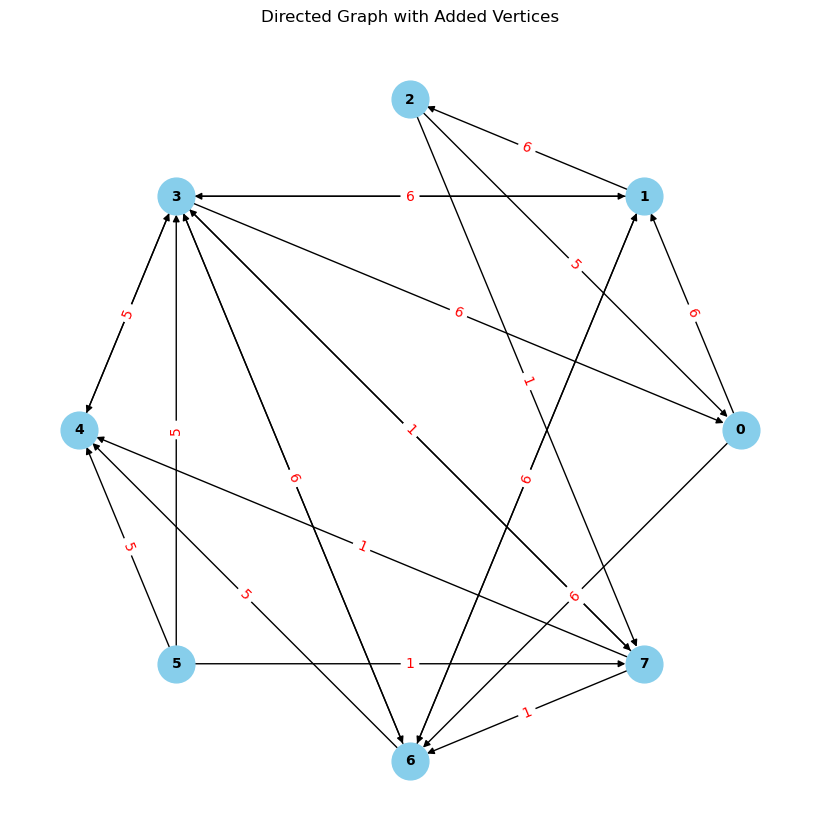

In [26]:
# Using networkX, plot your directed graph with added vertices according to outgoing_edges and incoming_edges
# Use circular graph layout
# Label your edges according to their weights

# Create a directed graph using NetworkX with the provided adjacency matrix
G = nx.DiGraph(directed_adj_mat_vertex_added)

# Define the layout for the nodes in a circular fashion
pos = nx.circular_layout(G)

# Label edges with their weights
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.set_edge_attributes(G, edge_labels, 'label')

# Create a figure for the plot with a specified node size and color
plt.figure(figsize=(8, 8))

# Draw the directed graph G with labels, node size, node color, font size, font color, and font weight
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

# Draw networkx edge labels using the obtained edge weights and with specified font color
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Set the title for the plot
plt.title("Directed Graph with Added Vertices")

# Display the plot
plt.show()

## Exercise 5: Re-wire neurons to restore behavior of C. elegans

<img src="lab5_exercise5.png" width="1000">

### Note: If you wish to use the included C. elegans simulation code in lab template folder outside of EE 241 (e.g. research purpose), please cite the following paper 
### Kim, J., Leahy, W., & Shlizerman, E. (2019). Neural interactome: Interactive simulation of a neuronal system. Frontiers in Computational Neuroscience, 13, 8. 

In [27]:
# Load synaptic connectome and neuron classes

damaged_syn_conn_pd = pd.read_excel('connectome_syn.xlsx')
damaged_syn_conn_np = np.array(damaged_syn_conn_pd)

## Motorneurons' activities during gentle tail touch (Damaged brain)

<img src="damaged_AVA_motor_activities.png" width="450">

## Simulated body movement during gentle tail touch (Damaged brain)

In [28]:
from ipywidgets import Video

Video.from_file("escape_response_damaged.mp4", width=500, height=500)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...', height='500', wid…

In [29]:
# Re-wiring instructions for AVAL and AVAR neurons

outgoing_AVAL_triples = np.load('AVAL_outgoing_triples.npy') # AVAL is the 47th vertex in the graph
incoming_AVAL_triples = np.load('AVAL_incoming_triples.npy') # AVAL is the 47th vertex in the graph

outgoing_AVAR_triples = np.load('AVAR_outgoing_triples.npy') # AVAR is the 55th vertex in the graph
incoming_AVAR_triples = np.load('AVAR_incoming_triples.npy') # AVAR is the 55th vertex in the graph

# Each row in the triple is ordered as [Source neuron index, Target neuron index, Synaptic weight]

rewiring_triples_AVAL = [outgoing_AVAL_triples, incoming_AVAL_triples]
rewiring_triples_AVAR = [outgoing_AVAR_triples, incoming_AVAR_triples]

In [30]:
# Function to rewire damaged synaptic connections based on given instructions
# Parameters:
# damaged_synaptic_adj_matrix - Original synaptic adjacency matrix with damaged connections
# rewiring_instructions_AVAL - Rewiring instructions for AVAL neurons
# rewiring_instructions_AVAR - Rewiring instructions for AVAR neurons
def rewire_neurons(damaged_synaptic_adj_matrix, rewiring_instructions_AVAL, rewiring_instructions_AVAR): 

    # Create a copy of the damaged synaptic adjacency matrix to avoid modifying the original
    repaired_synaptic_adj_matrix = np.copy(damaged_synaptic_adj_matrix)

    # Rewire AVAL neurons based on the first set of instructions
    for triple in rewiring_instructions_AVAL[0]:
        source, target, weight = triple
        repaired_synaptic_adj_matrix[source, target] = weight

    # Rewire AVAL neurons based on the second set of instructions
    for triple in rewiring_instructions_AVAL[1]:
        source, target, weight = triple
        repaired_synaptic_adj_matrix[source, target] = weight

    # Rewire AVAR neurons based on the first set of instructions
    for triple in rewiring_instructions_AVAR[0]:
        source, target, weight = triple
        repaired_synaptic_adj_matrix[source, target] = weight

    # Rewire AVAR neurons based on the second set of instructions
    for triple in rewiring_instructions_AVAR[1]:
        source, target, weight = triple
        repaired_synaptic_adj_matrix[source, target] = weight

    # Return the repaired synaptic adjacency matrix
    return repaired_synaptic_adj_matrix
    

In [31]:
repaired_synaptic_adj_matrix = rewire_neurons(damaged_synaptic_adj_matrix = damaged_syn_conn_np, 
                                              rewiring_instructions_AVAL = rewiring_triples_AVAL, 
                                              rewiring_instructions_AVAR = rewiring_triples_AVAR)

Repair operation successful! - Simulating the nervous system and body for gentle tale touch
All neurons are healthy
Network integration prep completed...
Computing network dynamics...


C:\Users\noahl\Downloads\Lab5_Report_Template\Lab5_Report_Template\dynworm\network_sim.py:278: RuntimeWarning: overflow encountered in exp
  np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth'])))))
C:\Users\noahl\Downloads\Lab5_Report_Template\Lab5_Report_Template\dynworm\network_sim.py:308: RuntimeWarning: overflow encountered in exp
  sigmoid_V = np.reciprocal(1.0 + np.exp(-params_obj_neural['B']*(np.subtract(Vvec, params_obj_neural['vth']))))


11.1% completed
22.2% completed
33.3% completed
44.4% completed
55.5% completed
66.6% completed
77.7% completed
88.9% completed
100.0% completed


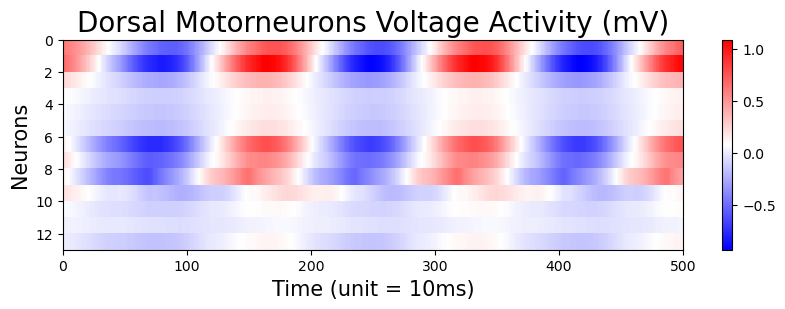

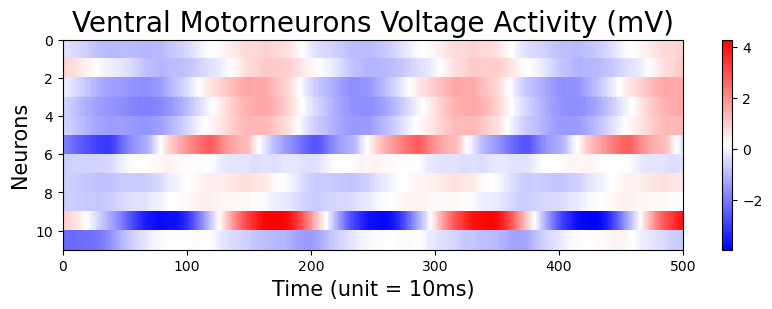

In [32]:
# Test your repaired connectome 

dw.network_sim.test_brain_repair(repaired_synaptic_adj_matrix) 

# If successfully repaired, function will output 
# 1) Motorneurons activity 
# 2) Simulated body movement video with repaired brain